# Image preprocessing

In this notebook, we're going to investigate the basic steps needed to make your machine learning model extract the most information out of images.

Often, images come from different sources, having different sizes and different colors.  For maximum accuracy and to reduce the complexity, these images need to be transformed into a common format.

Image processing is a very important step in computer vision, the field which studies information extraction out of images. The field is not new, and most image processing techniques are very math-heavy and have been around for quite some time now. And they hold up very well, even for today's standard. Most of the time, mathematical algorithms are enough for most applications, you rarely need to resort to a machine learning model.

The following notebook will also be finalised with your help. 
First, I define helper functions that will display a single image and a function that will display the original and the edited image side by side.

In [4]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 6.8 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 12.4 MB/s eta 0:00:01


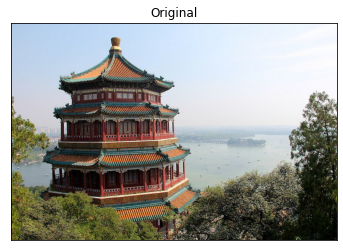

In [5]:
%matplotlib inline
from sklearn.datasets import load_sample_images
from matplotlib import pyplot as plt
import numpy as np

# Display one image
def display_one(img, title1 = "Original", isGray=False):
    if isGray:
        plt.imshow(img, cmap="gray")
    else:
        plt.imshow(img)

    plt.title(title1)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
# Display two images
def display_two(original_img, edited_img, title1 = "Original", title2 = "Edited", isGray=False):
    plt.figure(figsize=(18,13))
    
    plt.subplot(121)
    if isGray:
        # If we want to display a gray image, we have to tell pyplot to use a gray color map,
        # otherwise it will not render the image as grayscale
        plt.imshow(original_img, cmap="gray") 
    else:
        plt.imshow(original_img)
    plt.title(title1), plt.xticks([]), plt.yticks([])
    
    plt.subplot(122)
    
    if isGray:
        plt.imshow(edited_img, cmap="gray")
    else:
        plt.imshow(edited_img)
    plt.title(title2), plt.xticks([]), plt.yticks([])

    plt.show()

dataset = load_sample_images()
original_image = dataset.images[0]
display_one(original_image)

## Image resizing


In [6]:
!pip3 install scikit-build

In [3]:
!pip3 install opencv-python

In [1]:
!pip3 install opencv-contrib-python

Defaulting to user installation because normal site-packages is not writeable


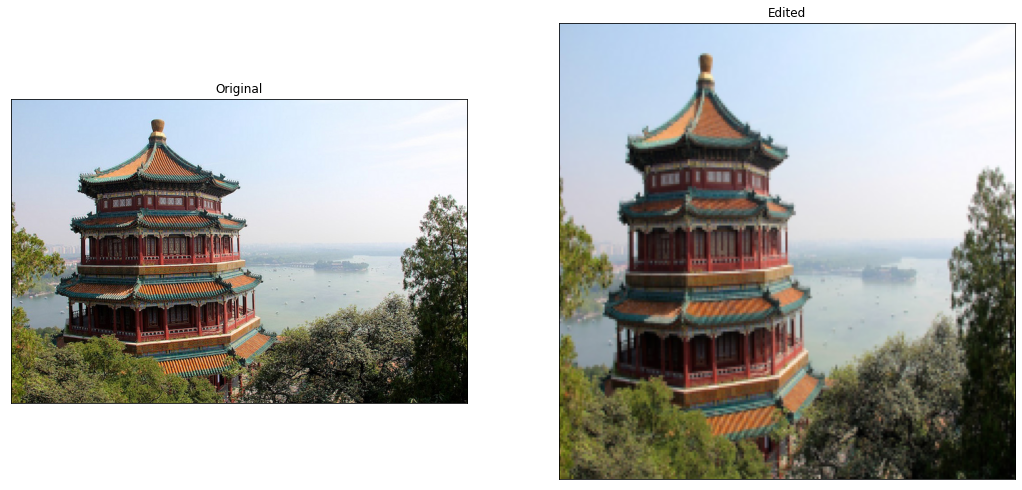

In [6]:
# Resize the image using the cv2.resize() method and linear interpolation
import numpy as np
import cv2
height = 220
width = 220
dim = (width, height)

edited_image = cv2.resize(original_image, dim, interpolation = cv2.INTER_AREA)
display_two(original_image, edited_image)

## Color transformation

Transforming your images into a different color schema is useful. The most common transformation is from color to grayscale. This is because the detection of objects mostly relies on the shape of an object.
Moreover, because color images contain more information than black and white images, they can add unnecessary complexity and take up more space in memory (Remember how color images are represented in three channels, which means that converting it to grayscale reduces the number of pixels that need to be processed).

However, as always, it is problem dependent. A machine learning model trained to recognize red rashes on skin surely performs better when it can distinguish the red color from the 'skin-tone' color. In this case, converting the image to grayscale would be detrimental to the performance of the model.

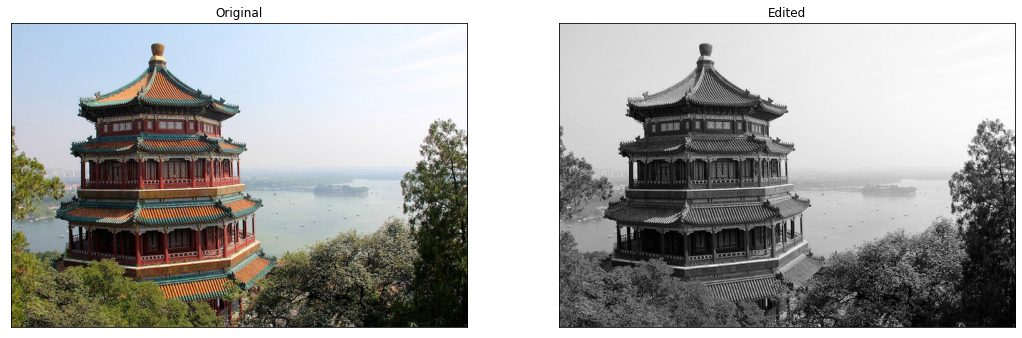

In [7]:
# Transform the image to grayscale using cv2.cvtColor()
edited_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY ) 
display_two(original_image, edited_image, isGray=True)

## Data augmentation

A common technique to augment the size and the variation of the dataset to give multiple chances to the machine learning model to correctly classify an image are the following transformations, which are depicted in the picture below. 
The most common way of creating more data that is very similar to the original image is to rotate and/or mirror the image. Using this technique, you can get at least twice the amount of data that you had originally.


Depending on the problem, you will want to use some of these or not. These transformations can also be used standalone on an image and feeding only that image to the machine learning model, and not the original image.

* Detexturizing/removing noise
* Color transformation
* Edge enhancement
* Edge detection
* Rotating and mirroring the image   


![Data augmentation (Image)](assets/data_augmentation.png)

[Image source](https://livebook.manning.com/book/grokking-deep-learning-for-computer-vision/chapter-1/v-8/20)


### Edge enhancement
Edge enhancement can mean a lot of things. In this case, we're using an *unsharp mask* which sharpens the edges of the image, making them stand out more.

In [8]:
def unsharp_mask(image, kernel_size=(5, 5), sigma=1.0, amount=1.0, threshold=0):
    """Return a sharpened version of the image, using an unsharp mask.
    
    Taken from https://stackoverflow.com/a/55590133
    """
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened

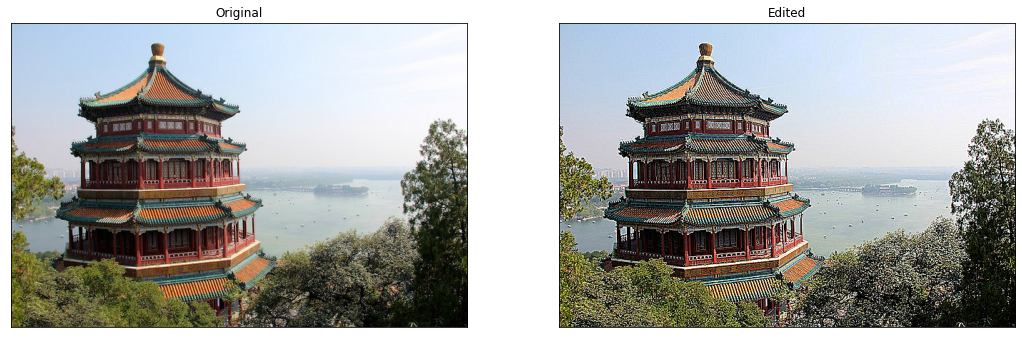

In [9]:
edited_image = unsharp_mask(original_image, amount=3.0)
display_two(original_image, edited_image)

### Rotating and mirroring the image

In [10]:
!pip install imutils

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for imutils: filename=imutils-0.5.3-py3-none-any.whl size=26732 sha256=a090cfd0a4fbeb266ba6a7f23e37249f57dec068edd4f4cf98736f23c6a8cff4
  Stored in directory: /home/becode/.cache/pip/wheels/fc/9c/6d/1826267c72afa51b564c9c6e0f66abc806879338bc593a2270
Successfully built imutils


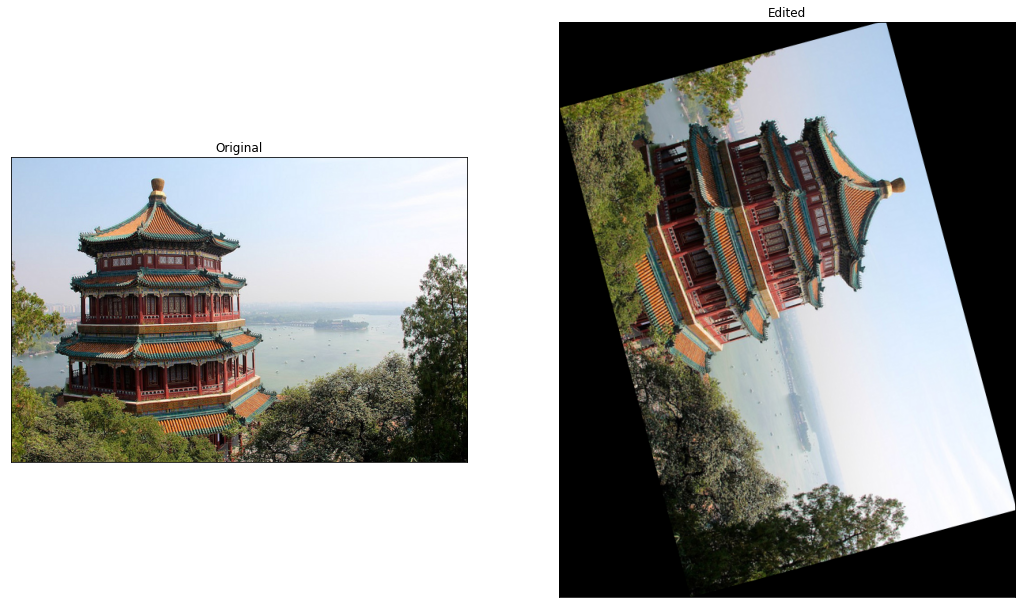

In [15]:
# Rotate the image using imutils.rotate_bound()
import imutils
edited_image = imutils.rotate_bound(original_image, 75)
display_two(original_image, edited_image)

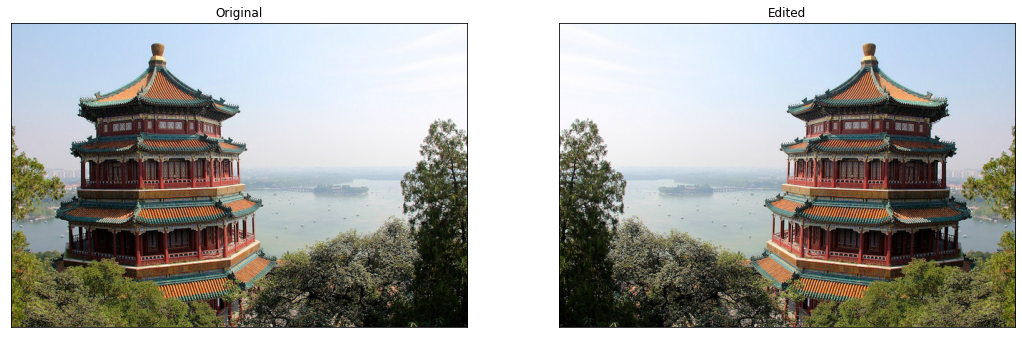

In [16]:
# Mirror the image using cv2.flip()
edited_image = cv2.flip(original_image, 1)
display_two(original_image, edited_image)

## Denoising data

Something, images contain noise that might perturb the machine learning algorithm. Noise in this case are the random changes in brightness and colors in the image. This is often used to remove the false detection of edges in an edge-detection algorithm.
We can smooth out the image to remove most of the noise, which makes the image appear sort of blurry, similar to how it would be seen through a semi-transparent window.


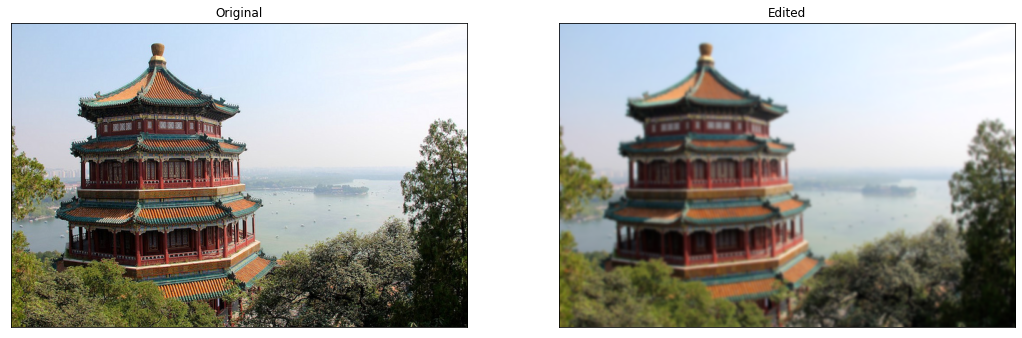

In [18]:
# Remove noise from the picture using cv2.GaussianBlur()
kernel_size=(9, 9) # You can change the kernel size to have more or less smoothing (must be odd numbers)
edited_image = cv2.GaussianBlur(original_image, kernel_size, 0) 
display_two(original_image, edited_image)

## Edge detection

Edge detection - as the name implies - is the task of detecting edges in a picture.
We're using the famous *Canny Edge Detector* to detect edges.

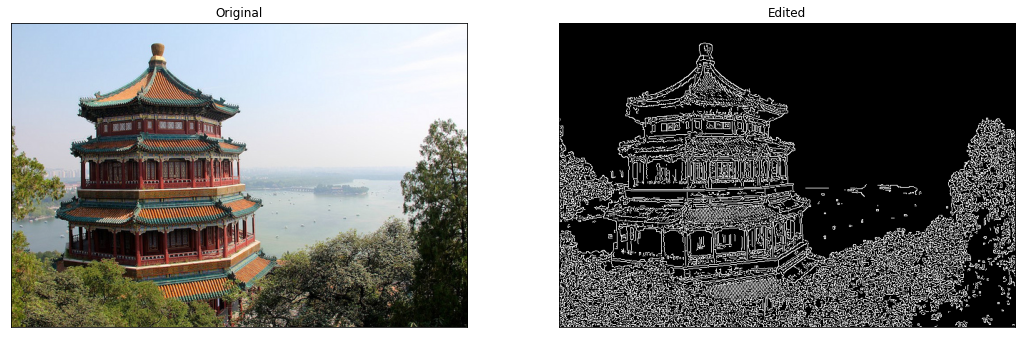

In [20]:
# Detect the edges of an image using cv2.Canny() 

edited_image = cv2.Canny(original_image,100,200)
display_two(original_image, edited_image, isGray=True)

## References and more reading material
[Image enhancement - Towards Data Science](https://towardsdatascience.com/image-enhancement-techniques-using-opencv-and-python-9191d5c30d45)

[Image preprocessing pipeline - Medium](https://medium.com/@ManningBooks/the-computer-vision-pipeline-part-3-image-preprocessing-c662094835ec)

[OpenCV Image Processing Tutorial - OpenCV Documentation](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_table_of_contents_imgproc/py_table_of_contents_imgproc.html)